# Exploratory Analysis
In between this notebook, and the first, I cleaned the data further in Excel since the dataset was small enough to begin with. First, I combined the various LGBT related biases into one as 'Anti-LGBT'. I also, cleaned up some other biases to make the entire column uniform as possible. Second, I cleaned the offender ethnicity column for the same reason. The resulting dataset lists 56 separate alleged hate crimes, in Austin, TX, since 2017. 

Out of the total number of reported, alleged incidents, 30% were directed at the LGBT Community. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing & examining the cleaned dataset
df = pd.read_csv(r'C:\Users\Robert\OneDrive\Desktop\aus_final.csv')

display(df.shape)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.columns)
print('----------------------------------')
display(df.index)
print('----------------------------------')
display(df.describe())
print('----------------------------------')
display(df.dtypes)

(60, 10)

----------------------------------


,incident number,bias,date_of_incident,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,offender_race/ethnicity
0,2017-1021534,anti-jewish,4/12/2017,0,0,0,0,Simple Assault,Air/Bus/Train Terminal,caucasian
1,2017-1351550,anti-lgbt,5/15/2017,2,1,0,1,Simple Assault,Residence/Home,caucasian
2,2017-1550219,anti-lgbt,6/4/2017,2,0,1,0,Simple Assault,Highway/Road/Alley/Street/Sidewalk,caucasian
3,2017-1660914,anti-hispanic,6/15/2017,1,0,1,0,Intimidation,Bank/Savings and Loan,caucasian
4,2017-1681488,anti-african american,6/17/2017,1,0,1,0,Simple Assault,Highway/Road/Alley/Street/Sidewalk,caucasian


----------------------------------


,incident number,bias,date_of_incident,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,offender_race/ethnicity
55,2020-5015689,anti-buddhist,4/20/2020,0,0,1,0,Criminal Mischief,Church/Synagogue/Temple/Mosque,unknown
56,2020-5016804,anti-lgbt,4/29/2020,1,0,1,0,Assault by Threat,Department/Discount Store,african american
57,2020-602085,anti-african american,3/1/2020,1,0,1,0,Criminal Mischief,Residence/Home,caucasian
58,2020-680226,anti-lgbt,3/8/2020,2,0,1,0,Assault,Parking Lot,hispanic
59,2020-5011788,anti-jewish,3/22/2020,0,0,1,0,Criminal Mischief,Residence/Home,unknown


----------------------------------


Index(['incident number', 'bias', 'date_of_incident',
       'number_of_offenders_over_18', 'number_of_offenders_under_18',
       'number_of_victims_over_18', 'number_of_victims_under_18', 'offense',
       'offense_location', 'offender_race/ethnicity'],
      dtype='object')

----------------------------------


RangeIndex(start=0, stop=60, step=1)

----------------------------------


,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18
count,60.000000,60.000000,60.000000,60.000000
mean,1.016667,0.116667,0.916667,0.050000
std,0.791730,0.490301,0.381419,0.219784
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,4.000000,3.000000,2.000000,1.000000


----------------------------------


incident number                 object
bias                            object
date_of_incident                object
number_of_offenders_over_18      int64
number_of_offenders_under_18     int64
number_of_victims_over_18        int64
number_of_victims_under_18       int64
offense                         object
offense_location                object
offender_race/ethnicity         object
dtype: object

In [3]:
# Creating an index out of the 'date' column annd converting the non-numeric columns into categories
df['date_of_incident'] = df['date_of_incident'].astype('datetime64')
df.set_index(['date_of_incident'], inplace=True)
df.sort_index(inplace=True)
df['bias'] = df['bias'].astype('category')
df['offense'] = df['offense'].astype('category')
df['offense_location'] = df['offense_location'].astype('category')
df['offender_race/ethnicity'] = df['offender_race/ethnicity'].astype('category')

# Reexamining the dataset
display(df.index)
print('----------------------------------')
display(df.dtypes)

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-21', '2017-04-12',
               '2017-05-15', '2017-06-04', '2017-06-15', '2017-06-17',
               '2017-07-01', '2017-07-05', '2017-07-20', '2017-07-21',
               '2017-10-15', '2017-10-24', '2017-11-10', '2017-11-16',
               '2017-11-26', '2018-01-19', '2018-01-25', '2018-02-08',
               '2018-02-22', '2018-03-02', '2018-03-06', '2018-03-08',
               '2018-04-01', '2018-04-30', '2018-05-21', '2018-06-16',
               '2018-06-28', '2018-08-13', '2018-08-25', '2018-09-09',
               '2018-09-11', '2018-10-11', '2018-10-19', '2018-12-15',
               '2018-12-29', '2019-01-19', '2019-02-22', '2019-03-31',
               '2019-04-04', '2019-06-11', '2019-08-06', '2019-08-12',
               '2019-08-24', '2019-11-23', '2019-12-19', '2019-12-30',
               '2020-03-01', '2020-03-08', '2020-03-22', '2020-03-22',
               '2020-04-20', '2020-04-29', '2020-05-17', '2020-05-20',
      

----------------------------------


incident number                   object
bias                            category
number_of_offenders_over_18        int64
number_of_offenders_under_18       int64
number_of_victims_over_18          int64
number_of_victims_under_18         int64
offense                         category
offense_location                category
offender_race/ethnicity         category
dtype: object

In [7]:
# Reexamining the head & tail
display(df.head())
print('----------------------------------')
display(df.tail())

,incident number,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,offender_race/ethnicity
date_of_incident,,,,,,,,,
2017-01-01,2017-241137,anti-african american,1,0,1,0,Aggravated Assault,Park/Playground,caucasian
2017-02-01,2017-580344,anti-caucasian,1,0,1,0,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,african american
2017-03-21,2017-800291,anti-jewish,0,0,0,0,Destruction,Highway/Road/Alley/Street/Sidewalk,unknown
2017-04-12,2017-1021534,anti-jewish,0,0,0,0,Simple Assault,Air/Bus/Train Terminal,caucasian
2017-05-15,2017-1351550,anti-lgbt,2,1,0,1,Simple Assault,Residence/Home,caucasian


----------------------------------


,incident number,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,offender_race/ethnicity
date_of_incident,,,,,,,,,
2020-05-20,2020-1410411,anti-hispanic,1,0,1,0,Assault with Injury,Streets/Highway/Road/Alley,caucasian
2020-06-04,2020-1560947,anti-african american,1,0,1,0,Criminal Mischief,Residence/Home,unknown
2020-06-09,2020-1610708,anti-african american,1,0,1,0,Criminal Mischief,Streets/Highway/Road/Alley,unknown
2020-06-17,2020-1690572,anti-african american,1,0,1,0,Criminal Mischief,Parking Lot,unknown
2020-06-23,2020-1750961,anti-african american,1,0,1,0,Criminal Mischief,Streets/Highway/Road/Alley,unknown


### Question 1. How are reported incidences in Austin distributed according to motivation? 

anti-african american    22
anti-lgbt                18
anti-hispanic             7
anti-muslim               4
anti-jewish               4
anti-caucasian            3
anti-disability           1
anti-buddhist             1
Name: bias, dtype: int64

----------------------------------


anti-african american    0.366667
anti-lgbt                0.300000
anti-hispanic            0.116667
anti-muslim              0.066667
anti-jewish              0.066667
anti-caucasian           0.050000
anti-disability          0.016667
anti-buddhist            0.016667
Name: bias, dtype: float64

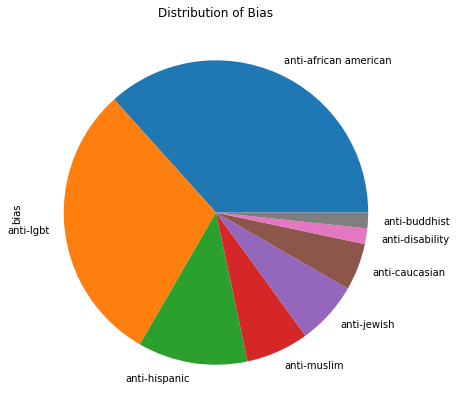

In [4]:
# Create and display a dataframe of the biases
bias = df.bias.value_counts()
display(bias)

# Create and display a dataframe of the biases as percentages
bias_pct = df.bias.value_counts(normalize=True)
print('----------------------------------')
display(df.bias.value_counts(normalize=True))

# Visualizing bias values as proportions
bias_pct.plot.pie(figsize=(7,7))
plt.title('Distribution of Bias')
plt.show()

### Question 2. How are hate crimes perpetuated? 

Assault                21
Criminal Mischief       9
Simple Assault          8
Intimidation            7
Vandalism               4
Aggravated Assault      3
Destruction             2
Theft                   1
Robbery                 1
Burglary/Assault        1
Assault with Injury     1
Assault by Threat       1
Assault by Contact      1
Name: offense, dtype: int64

----------------------------------


Assault                0.350000
Criminal Mischief      0.150000
Simple Assault         0.133333
Intimidation           0.116667
Vandalism              0.066667
Aggravated Assault     0.050000
Destruction            0.033333
Theft                  0.016667
Robbery                0.016667
Burglary/Assault       0.016667
Assault with Injury    0.016667
Assault by Threat      0.016667
Assault by Contact     0.016667
Name: offense, dtype: float64

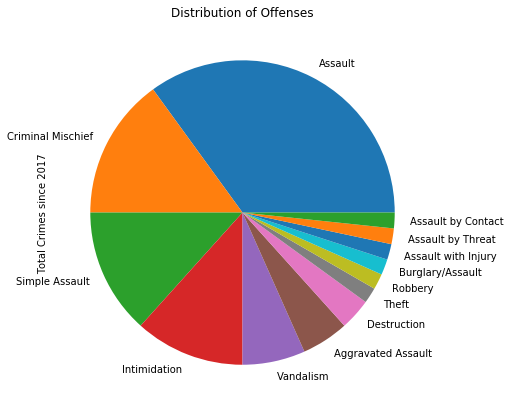

In [5]:
# Create a dataframe for the offense values
offense_count = df.offense.value_counts()
display(offense_count)

# Displaying the offense values as proportions
print('----------------------------------')
offense_count_pct = df.offense.value_counts(normalize=True)
display(offense_count_pct)


# Visualizing the offense values
offense_count.plot.pie(figsize=(7,7))
plt.ylabel('Total Crimes since 2017')
plt.title('Distribution of Offenses')
plt.show()

There are so many types of assault. I am unsure, legally speaking, what the difference is between all the assault variables. Definitely a question for further research. 

### Question 3. What is the race/ethnicity of the offenders?      

hispanic                       22
unknown                        15
caucasian                      15
african american                5
hispanic (2), caucasian (2)     1
caucasian                       1
asian                           1
Name: offender_race/ethnicity, dtype: int64

----------------------------------


hispanic                       0.366667
unknown                        0.250000
caucasian                      0.250000
african american               0.083333
hispanic (2), caucasian (2)    0.016667
caucasian                      0.016667
asian                          0.016667
Name: offender_race/ethnicity, dtype: float64

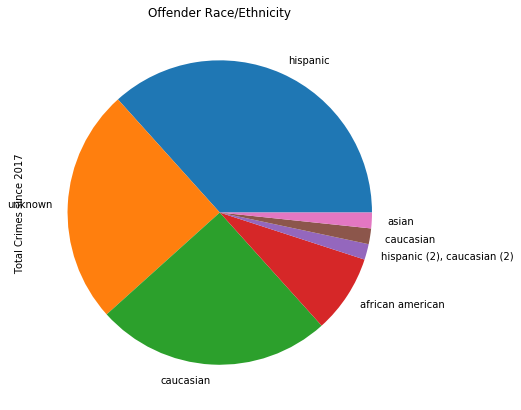

In [11]:
# Create a dataframe for the offender ethnicity values
offenders_count = df['offender_race/ethnicity'].value_counts()
display(offenders_count)
print('----------------------------------')

# Displaying the offender ethnicity values as proportions
offenders_count_pct = df['offender_race/ethnicity'].value_counts(normalize=True)
display(offenders_count_pct)

# Visualizing the offender ethnicity values
offenders_count.plot.pie(figsize=(7,7))
plt.ylabel('Total Crimes since 2017')
plt.title('Offender Race/Ethnicity')
plt.show()

Note...the above 'Offender' graph has an instance of 'Hispanic (2), Caucasian (2)' as a single column because of an incident that occurred on 1/19/19 https://www.statesman.com/news/20200124/confrontation-that-ignited-attack-on-austin-gay-couple-questioned-by-detective -- 2 of the offenders were white, and the other 2 were hispanic. 

### Question 4. Where in Austin do hate crimes often take place? 

Residence/Home                        12
Streets/Highway/Road/Alley             8
Highway/Road/Alley/Street/Sidewalk     6
Bar/Nightclub                          5
Parking Lot/Garage                     5
Convenience Store                      4
Highway/Road/Street                    4
Parking Lot                            2
Park/Playground                        2
Department/Discount Store              1
Bank/Savings and Loan                  1
Church/Synagogue                       1
Church/Synagogue/Temple/Mosque         1
Hotel/Motel                            1
Drug Store/Dr.'s office/Hospital       1
Shelter-Mission/Homeless               1
Other/unknown                          1
Parking/Drop Lot                       1
Restaurant                             1
School-Elementary/Secondary            1
Air/Bus/Train Terminal                 1
Name: offense_location, dtype: int64

----------------------------------


Residence/Home                        0.200000
Streets/Highway/Road/Alley            0.133333
Highway/Road/Alley/Street/Sidewalk    0.100000
Bar/Nightclub                         0.083333
Parking Lot/Garage                    0.083333
Convenience Store                     0.066667
Highway/Road/Street                   0.066667
Parking Lot                           0.033333
Park/Playground                       0.033333
Department/Discount Store             0.016667
Bank/Savings and Loan                 0.016667
Church/Synagogue                      0.016667
Church/Synagogue/Temple/Mosque        0.016667
Hotel/Motel                           0.016667
Drug Store/Dr.'s office/Hospital      0.016667
Shelter-Mission/Homeless              0.016667
Other/unknown                         0.016667
Parking/Drop Lot                      0.016667
Restaurant                            0.016667
School-Elementary/Secondary           0.016667
Air/Bus/Train Terminal                0.016667
Name: offense

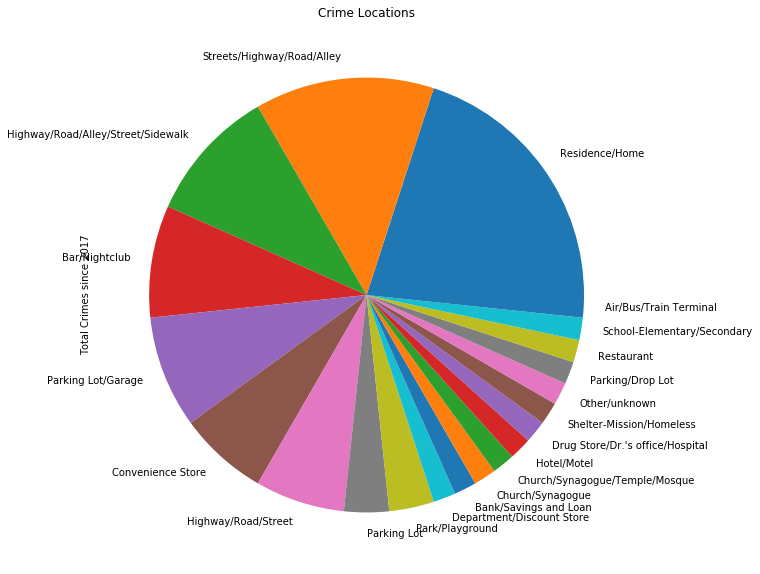

In [12]:
# Displaying 'offense location'
location = df.offense_location.value_counts()
display(location)
print('----------------------------------')

# Displaying 'offense location' as proportions
location_pct = df.offense_location.value_counts(normalize=True)
display(location_pct)

location.plot.pie(figsize=(10,10))
plt.ylabel('Total Crimes since 2017')
plt.title('Crime Locations')
plt.show()

It's interesting that 20% of the instances occurred within a residence/home. 

As a final look, let's examine the correlations between victims and offenders. 

,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18
number_of_offenders_over_18,1.000000,-0.179744,0.341437,-0.004870
number_of_offenders_under_18,-0.179744,1.000000,-0.400293,0.574092
number_of_victims_over_18,0.341437,-0.400293,1.000000,-0.556010
number_of_victims_under_18,-0.004870,0.574092,-0.556010,1.000000


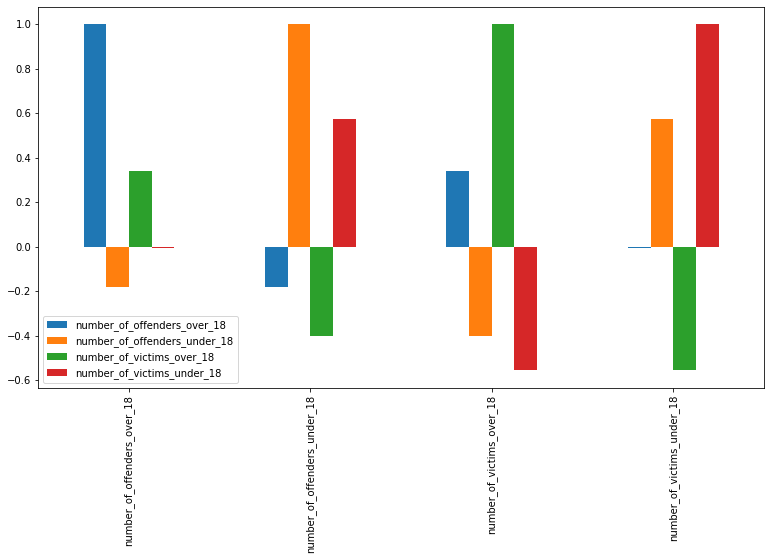

In [13]:
# Examining correlations between victims & offenders
df_corr = df.corr()

display(df_corr)
df_corr.plot.bar(figsize=(13,7))
plt.show()

There's not much correlation between any of the variables, save that the instances where the victim(s) is/are under 18, the offender(s) is/are more than likely to be under 18 as well. 